In [1]:
# Description: In conjunction of analyzing DBO

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [123]:
# Import libraries needed
import math
import pandas_datareader as web
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [101]:
# Pull stock data
df = web.DataReader('DBO', data_source='yahoo', start='2019-01-01',end='2020-07-22')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,8.82,8.20,8.25,8.63,868200.0,8.489923
2019-01-03,8.75,8.45,8.74,8.70,717700.0,8.558787
2019-01-04,9.09,8.80,8.91,8.91,722100.0,8.765378
2019-01-07,9.19,8.95,8.99,9.00,377000.0,8.853918
2019-01-08,9.22,9.06,9.13,9.19,311200.0,9.040833
...,...,...,...,...,...,...
2020-07-16,7.34,7.26,7.28,7.27,766200.0,7.270000
2020-07-17,7.30,7.19,7.28,7.28,828800.0,7.280000
2020-07-20,7.31,7.17,7.23,7.27,687800.0,7.270000


In [102]:
# Get the number of rows and columns in the data set
df.shape

(392, 6)

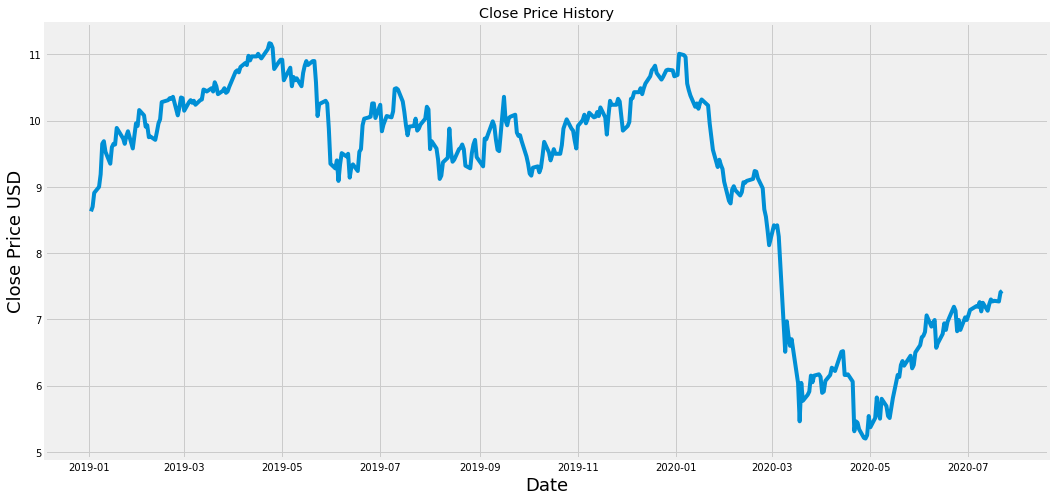

In [103]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

In [104]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the LST model on 
training_data_len = math.ceil( len(dataset) * 0.8 )
training_data_len

314

In [105]:
# Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.57453939],
       [0.58626463],
       [0.62144051],
       [0.63651592],
       [0.66834164],
       [0.74539357],
       [0.75209373],
       [0.72529309],
       [0.69514244],
       [0.73701849],
       [0.74539357],
       [0.74371865],
       [0.78559469],
       [0.75879389],
       [0.74539357],
       [0.76549421],
       [0.77721945],
       [0.73366833],
       [0.76549421],
       [0.79731994],
       [0.79061977],
       [0.83082074],
       [0.81742042],
       [0.78894469],
       [0.79229485],
       [0.76214405],
       [0.76381913],
       [0.75544389],
       [0.77554437],
       [0.79731994],
       [0.80737026],
       [0.85092122],
       [0.85594646],
       [0.86097154],
       [0.85929646],
       [0.86432154],
       [0.81742042],
       [0.8375209 ],
       [0.86264662],
       [0.86097154],
       [0.82914566],
       [0.85092122],
       [0.85594646],
       [0.8492463 ],
       [0.85427138],
       [0.84422106],
       [0.85594646],
       [0.857

In [106]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.57453939, 0.58626463, 0.62144051, 0.63651592, 0.66834164,
       0.74539357, 0.75209373, 0.72529309, 0.69514244, 0.73701849,
       0.74539357, 0.74371865, 0.78559469, 0.75879389, 0.74539357,
       0.76549421, 0.77721945, 0.73366833, 0.76549421, 0.79731994,
       0.79061977, 0.83082074, 0.81742042, 0.78894469, 0.79229485,
       0.76214405, 0.76381913, 0.75544389, 0.77554437, 0.79731994,
       0.80737026, 0.85092122, 0.85594646, 0.86097154, 0.85929646,
       0.86432154, 0.81742042, 0.8375209 , 0.86264662, 0.86097154,
       0.82914566, 0.85092122, 0.85594646, 0.8492463 , 0.85427138,
       0.84422106, 0.85594646, 0.85762138, 0.88274711, 0.88107203,
       0.87772187, 0.88609711, 0.87772187, 0.90117251, 0.89112235,
       0.8710217 , 0.87939695, 0.88609711, 0.87437186, 0.87772187])]
[0.8894472666848668]

[array([0.57453939, 0.58626463, 0.62144051, 0.63651592, 0.66834164,
       0.74539357, 0.75209373, 0.72529309, 0.69514244, 0.73701849,
       0.74539357, 0.74371865, 0.785

In [107]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [108]:
# Reshape the data for LSTM for a 3D shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(254, 60, 1)

In [109]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [110]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [111]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
254/254 [==============================] - 11s 43ms/step - loss: 0.0210


In [112]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [113]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [114]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [115]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [116]:
# Get the root mean squre error (RMSE) - to test the performance of the model
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.1777217938349797

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


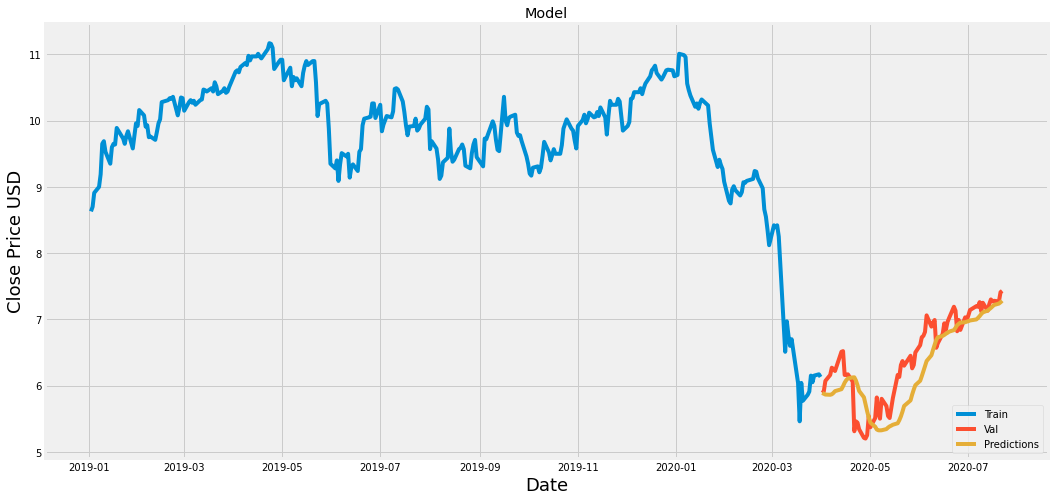

In [117]:
# Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [118]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-04-01,5.89,5.888173
2020-04-02,5.91,5.876271
2020-04-03,6.07,5.864137
2020-04-06,6.16,5.860580
2020-04-07,6.27,5.867851
...,...,...
2020-07-16,7.27,7.194983
2020-07-17,7.28,7.217008
2020-07-20,7.27,7.237989


In [119]:
# Get the quote
dbo_quote = web.DataReader('DBO', data_source='yahoo', start='2019-01-01', end='2020-07-22')
new_df = dbo_quote.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[7.3089347]]


In [120]:
# Get the quote
dbo_quote2 = web.DataReader('DBO', data_source='yahoo', start='2020-07-22', end='2020-07-22')
print(dbo_quote2['Close'])

Date
2020-07-22    7.43
Name: Close, dtype: float64


In [122]:
((7.3089347 - 7.43) / 7.3089347)*100

-1.6564014452065048